In [150]:
import pandas as pd
import numpy as np

In [151]:
file1 = '/Users/tierra/Desktop/2017_data'
file2= '/Users/tierra/Desktop/2018_data'

data17 = pd.read_csv(file1)
data18 = pd.read_csv(file2)

In [152]:
data17.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Generosity,Freedom to make life choices,Perceptions of corruption,Confidence in national government,Happiness score
0,Finland,7.788252,10.611172,0.963826,71.800003,-0.005696,0.962199,0.192413,0.597539,7.632
1,Norway,7.578745,11.079062,0.950128,73.099998,0.218105,0.953017,0.249711,0.717160,7.594
2,Denmark,7.593702,10.751125,0.952100,72.099998,0.152028,0.955416,0.181148,0.572353,7.555
3,Iceland,7.476214,10.746841,0.966753,73.000000,0.243324,0.938783,0.726845,0.365042,7.495
4,Switzerland,7.473593,10.957976,0.949661,73.800003,0.175113,0.924997,0.316183,0.819707,7.487


In [363]:
data18.head(10)

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Generosity,Freedom to make life choices,Perceptions of corruption,Confidence in national government,Happiness score
0,Finland,7.858107,10.636060,0.962155,71.900002,-0.131735,0.937807,0.198605,0.555102,7.769
1,Denmark,7.648786,10.755594,0.958219,72.400002,0.015593,0.935438,0.150607,0.632478,7.600
2,Norway,7.444262,11.085626,0.965962,73.199997,0.075728,0.960429,0.268201,0.679503,7.554
3,Netherlands,7.463097,10.809204,0.939443,72.300003,0.155536,0.919985,0.370558,0.656541,7.488
4,Switzerland,7.508587,10.975945,0.930291,74.099998,0.096369,0.926415,0.301260,0.849979,7.480
5,Sweden,7.374792,10.766932,0.930680,72.599998,0.069573,0.941725,0.262797,0.494396,7.343
6,New Zealand,7.370286,10.501477,0.953863,73.199997,0.116750,0.949300,0.206580,0.642461,7.307
7,Canada,7.175497,10.701248,0.922719,73.599998,0.097966,0.945783,0.371741,0.610467,7.278
8,Austria,7.396002,10.741893,0.911668,73.000000,0.051552,0.904112,0.523061,0.488679,7.246
9,Australia,7.176993,10.721021,0.940137,73.599998,0.137795,0.916028,0.404647,0.468837,7.228


In [126]:
from sklearn.linear_model import LinearRegression

# 2017

In [128]:
X = data17[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
            'Generosity','Freedom to make life choices','Perceptions of corruption',
           'Confidence in national government']]
y = data17[['Happiness score']]
X.shape, y.shape

((126, 8), (126, 1))

#### Fit model

In [129]:
model_17 = LinearRegression()
model_17.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Prediction

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Plot Residuals

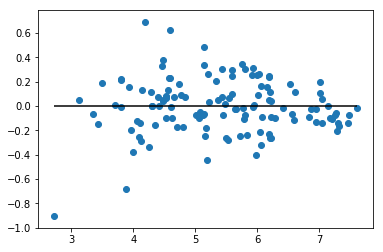

In [132]:
plt.scatter(ynew, ynew - y)
plt.hlines(y=0, xmin=ynew.min(), xmax=ynew.max())
plt.show()

In [133]:
score_17 = model_17.score(X, y)
print(f"R2 Score: {score_17}")

R2 Score: 0.9608349116876328


In [134]:
r2adj = 1 - (1-model_17.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
r2adj

0.9581569569312316

In [135]:
from sklearn.metrics import mean_squared_error


In [136]:
MSE_17 = mean_squared_error(y, ynew)

In [137]:
print(f"MSE: {MSE_17}, R2: {score_17}")

MSE: 0.04992633577840592, R2: 0.9608349116876328


# 2018

In [154]:
X18 = data18[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
             'Generosity','Freedom to make life choices','Perceptions of corruption',
             'Confidence in national government']]
y18 = data18[['Happiness score']]
X18.shape, y18.shape

((113, 8), (113, 1))

### Fitting 2018 model

In [165]:
model_18 = LinearRegression()
model_18.fit(X18, y18)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Prediction

In [166]:
ynew18 = model_18.predict(X18)

#### Residuals

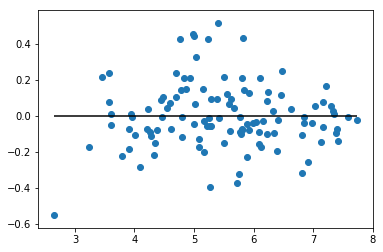

In [167]:
plt.scatter(ynew18, ynew18 - y18)
plt.hlines(y=0, xmin=ynew18.min(), xmax=ynew18.max())
plt.show()

In [168]:
from sklearn.metrics import mean_squared_error

In [169]:
score_18 = model_18.score(X18, y18)
MSE_18 = mean_squared_error(y18, ynew18)
print(f"MSE: {MSE_18}, R2: {score_18}")

MSE: 0.03238342531668717, R2: 0.974346459513798


In [108]:
ynew_18_m17 = model_17.predict(X18)

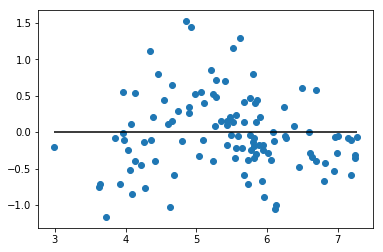

In [109]:
plt.scatter(ynew_18_m17, ynew_18_m17 - y18)
plt.hlines(y=0, xmin=ynew_18_m17.min(), xmax=ynew_18_m17.max())
plt.show()

In [116]:
score_18_m17 = model_17.score(X18, y18)
MSE_18_m17 = mean_squared_error(y18, ynew_18_m17)
print(f"MSE: {MSE_18_m17}, R2: {score_18_m17}")

MSE: 0.2707989471399493, R2: 0.7854781671135997


#### Applying Model to different years

#### Data

In [160]:
file12 = '/Users/tierra/Desktop/2012_data'
file13 = '/Users/tierra/Desktop/2013_data'
file14 = '/Users/tierra/Desktop/2014_data'
file15 = '/Users/tierra/Desktop/2015_data'
file16 = '/Users/tierra/Desktop/2016_data'


data12 = pd.read_csv(file12)
data13 = pd.read_csv(file13)
data14 = pd.read_csv(file14)
data15 = pd.read_csv(file15)
data16 = pd.read_csv(file16)


#### 2012

In [164]:
X12 = data12[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
             'Generosity','Freedom to make life choices','Perceptions of corruption',
             'Confidence in national government']]

X12.shape

(114, 8)

In [173]:
y12 = model_18.predict(X12)
y12.shape

(114, 1)

In [184]:
y12_df = pd.DataFrame(y12)
hp_scr_12 = pd.merge(data12, y12_df, left_index=True, right_index=True).\
            rename(columns={0:'HSP_12'}).sort_values('HSP_12',ascending=False).\
            reset_index().drop('index',axis=1)

hp_scr_12.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Generosity,Freedom to make life choices,Perceptions of corruption,Confidence in national government,HSP_12
0,Switzerland,7.776209,10.935776,0.946864,72.779999,0.133088,0.945428,0.323241,0.769940,7.662486
1,Norway,7.678277,11.050944,0.947657,72.239998,0.128628,0.946566,0.368043,0.663341,7.595342
2,Iceland,7.590660,10.594924,0.978965,72.760002,0.239700,0.904655,0.758586,0.257336,7.521204
3,Denmark,7.519909,10.699571,0.951437,70.839996,0.134192,0.932628,0.187408,0.534253,7.501434
4,Sweden,7.560148,10.676098,0.929397,72.059998,0.125826,0.944382,0.253543,0.626497,7.491099


#### 2013

In [185]:
X13 = data13[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
             'Generosity','Freedom to make life choices','Perceptions of corruption',
             'Confidence in national government']]

X13.shape

(120, 8)

In [186]:
y13 = model_18.predict(X13)
y13.shape

(120, 1)

In [189]:
y13_df = pd.DataFrame(y13)
hp_scr_13 = pd.merge(data13, y13_df, left_index=True, right_index=True).\
            rename(columns={0:'HSP_13'}).sort_values('HSP_13',ascending=False).\
            reset_index().drop('index',axis=1)

hp_scr_13.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Generosity,Freedom to make life choices,Perceptions of corruption,Confidence in national government,HSP_13
0,Denmark,7.588607,10.704692,0.964708,71.059998,0.210208,0.920255,0.170042,0.391405,7.613643
1,Canada,7.593794,10.653473,0.936239,72.680000,0.308130,0.916014,0.406236,0.505976,7.543675
2,Iceland,7.501394,10.627644,0.967145,72.839996,0.304013,0.923208,0.712599,0.456566,7.421160
3,Austria,7.498803,10.698765,0.949809,71.820000,0.166401,0.921734,0.678937,0.417099,7.404721
4,Finland,7.444636,10.582239,0.940869,71.120003,0.034852,0.918625,0.305770,0.420594,7.403065


#### 2014

In [190]:
X14 = data14[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
             'Generosity','Freedom to make life choices','Perceptions of corruption',
             'Confidence in national government']]

X14.shape

(127, 8)

In [191]:
y14 = model_18.predict(X14)
y14.shape

(127, 1)

In [194]:
y14_df = pd.DataFrame(y14)
hp_scr_14 = pd.merge(data14, y14_df, left_index=True, right_index=True).\
            rename(columns={0:'HSP_14'}).sort_values('HSP_14',ascending=False).\
            reset_index().drop('index',axis=1)

hp_scr_14.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Generosity,Freedom to make life choices,Perceptions of corruption,Confidence in national government,HSP_14
0,Denmark,7.507559,10.715685,0.956344,71.279999,0.113419,0.941572,0.237218,0.457837,7.496502
1,Switzerland,7.492804,10.954624,0.958796,73.059998,0.054533,0.949401,0.283090,0.751631,7.423640
2,Norway,7.444471,11.057524,0.941162,72.680000,0.162420,0.956316,0.404826,0.699691,7.380657
3,Finland,7.384571,10.571767,0.952017,71.360001,-0.005278,0.933044,0.265480,0.468559,7.349609
4,New Zealand,7.305892,10.447419,0.942381,72.480003,0.343987,0.931882,0.272609,0.629681,7.294685


#### 2015

In [195]:
X15 = data15[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
             'Generosity','Freedom to make life choices','Perceptions of corruption',
             'Confidence in national government']]

X15.shape

(126, 8)

In [196]:
y15 = model_18.predict(X15)
y15.shape

(126, 1)

In [213]:
y15_df = pd.DataFrame(y15)
hp_scr_15 = pd.merge(data15, y15_df, left_index=True, right_index=True).\
            rename(columns={0:'HSP_15'}).sort_values('HSP_15',ascending=False).\
            reset_index().drop('index',axis=1)

hp_scr_15.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Generosity,Freedom to make life choices,Perceptions of corruption,Confidence in national government,HSP_15
0,Norway,7.603434,11.066768,0.946834,72.900002,0.238337,0.947621,0.298814,0.586872,7.580990
1,Denmark,7.514425,10.724560,0.959701,71.500000,0.217953,0.941436,0.191016,0.579889,7.508177
2,Switzerland,7.572137,10.955430,0.938334,73.199997,0.103407,0.927802,0.209534,0.787730,7.497809
3,Iceland,7.498071,10.670074,0.980283,73.000000,0.298926,0.940485,0.638662,0.427228,7.450308
4,New Zealand,7.418121,10.471916,0.987343,72.599998,0.324836,0.941784,0.185889,0.620908,7.435813


#### 2016

In [198]:
X16 = data16[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
             'Generosity','Freedom to make life choices','Perceptions of corruption',
             'Confidence in national government']]

X16.shape

(125, 8)

In [199]:
y16 = model_18.predict(X16)
y16.shape

(125, 1)

In [200]:
y16_df = pd.DataFrame(y16)
hp_scr_16 = pd.merge(data16, y16_df, left_index=True, right_index=True).\
            rename(columns={0:'HSP_16'}).sort_values('HSP_16',ascending=False).\
            reset_index().drop('index',axis=1)

hp_scr_16.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Generosity,Freedom to make life choices,Perceptions of corruption,Confidence in national government,HSP_16
0,Finland,7.659843,10.588078,0.953940,71.699997,-0.030627,0.948372,0.249660,0.485727,7.587829
1,Denmark,7.557783,10.736206,0.954452,71.800003,0.134532,0.948231,0.209893,0.467661,7.549078
2,Norway,7.596332,11.069128,0.959743,73.000000,0.114255,0.954352,0.409666,0.657646,7.522866
3,Netherlands,7.540877,10.763623,0.925944,72.099998,0.233067,0.907310,0.433304,0.572273,7.465857
4,Iceland,7.510035,10.728341,0.984940,73.000000,0.278245,0.951610,0.719300,0.363518,7.459200


### Happiness Score (Predicted)

In [387]:
hps_final = pd.merge(hp_scr_16, hp_scr_15, on='Country name', how='left')
hps_final = pd.merge(hps_final, hp_scr_14, on='Country name', how='left')
hps_final = pd.merge(hps_final, hp_scr_13, on='Country name', how='left')
hps_final = pd.merge(hps_final, hp_scr_12, on='Country name', how='left')
hps_final = hps_final[['Country name','HSP_12','HSP_13','HSP_14','HSP_15','HSP_16']]



In [388]:
hp_scr_17 = data17[['Country name','Happiness score']]


In [389]:
hp_scr_18 = data18[['Country name','Happiness score']]


In [390]:
HPS_df = pd.merge(hps_final, hp_scr_17, on='Country name', how='left')
HPS_df = pd.merge(HPS_df, hp_scr_18, on='Country name', how='left')
HPS_df = HPS_df.rename(columns={'Happiness score_x':'HSP_17',
                               'Happiness score_y':'HSP_18'})
HPS_df = HPS_df[['Country name','HSP_14','HSP_15','HSP_16','HSP_17','HSP_18']].dropna().\
                    reset_index().drop('index',axis=1)


## MLR 2020

In [298]:
X_hs = HPS_df[['HSP_14','HSP_15','HSP_16','HSP_17']]
y_hs = HPS_df[['HSP_18']]

In [299]:
model_hsc = LinearRegression()
model_hsc.fit(X_hs, y_hs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [300]:
y_18 = model_hsc.predict(X_hs)

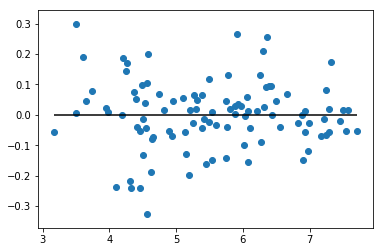

In [301]:
plt.scatter(y_18, y_18 - y_hs)
plt.hlines(y=0, xmin=y_18.min(), xmax=y_18.max())
plt.show()

In [302]:
score_18hs = model_hsc.score(X_hs,y_hs)
MSE_18hs = mean_squared_error(y_hs, y_18)
print(f"MSE: {MSE_18hs}, R2: {score_18hs}")

MSE: 0.012408255075281338, R2: 0.990220146049629


# 2019

In [303]:
X19 = HPS_df[['HSP_15','HSP_16','HSP_17','HSP_18']]

X19.shape

(102, 4)

In [304]:
y19 = model_hsc.predict(X19)
y19.shape

(102, 1)

In [305]:
score_19hs = model_hsc.score(X19,y19)

print(f" R2: {score_19hs}")

 R2: 1.0


In [318]:
y19_df = pd.DataFrame(y19)
Happy_bis = pd.merge(HPS_df, y19_df, left_index=True, right_index=True).\
            rename(columns={'Country name':'Country',
                            'HSP_14':'2014',
                           'HSP_15':'2015',
                           'HSP_16':'2016',
                           'HSP_17':'2017',
                           'HSP_18':'2018',
                           0:'2019'}).sort_values('2018',ascending=False).\
            reset_index().drop('index',axis=1)
Happy_bis = Happy_bis[['Country','2018','2019']].round(3)
Happy_bis.head()

,Country,2018,2019
0,Finland,7.769,7.839
1,Denmark,7.600,7.596
2,Norway,7.554,7.533
3,Netherlands,7.488,7.469
4,Switzerland,7.480,7.506


In [391]:
Happy = Happy_bis.reset_index().rename(columns={'index':'2018_Place'})
Happy['2018_Place'] = Happy['2018_Place'] + 1
Happy = Happy.sort_values('2019',ascending=False).reset_index().drop('index',axis=1).\
        reset_index().rename(columns={'index':'2019_Place'})
Happy['2019_Place'] = Happy['2019_Place'] + 1
Happy['Behavior'] = Happy['2018_Place'] - Happy['2019_Place']

In [392]:
Happy

,2019_Place,2018_Place,Country,2018,2019,Behavior
0,1,1,Finland,7.769,7.839,0
1,2,2,Denmark,7.600,7.596,0
2,3,3,Norway,7.554,7.533,0
3,4,5,Switzerland,7.480,7.506,1
4,5,4,Netherlands,7.488,7.469,-1
5,6,9,Austria,7.246,7.348,3
6,7,7,New Zealand,7.307,7.322,0
7,8,6,Sweden,7.343,7.310,-2
8,9,8,Canada,7.278,7.286,-1
9,10,11,Costa Rica,7.167,7.253,1


In [377]:
Happy.Behavior.min()

-7

In [380]:
Happy.loc[(Happy['Behavior'] == -7)]

,2019_Place,2018_Place,Country,2018,2019,Behavior
41,42,35,Argentina,6.086,5.947,-7
75,76,69,Nepal,4.913,4.867,-7
79,80,73,South Africa,4.722,4.691,-7


In [379]:
Happy.loc[(Happy['Behavior'] == 16)]

,2019_Place,2018_Place,Country,2018,2019,Behavior
53,54,70,Benin,4.883,5.537,16


In [376]:
Happy.Behavior.max()

16

In [374]:
box = Happy[['2019_Place','Country','2018','2019','Behavior']].\
        rename(columns={'2019_Place':'2019 Ranking',
                        '2018':'2018_Score',
                       '2019':'2019_Pred'})
box.tail(23)

,2019 Ranking,Country,2018_Score,2019_Pred,Behavior
79,80,South Africa,4.722,4.691,-7
80,81,Mali,4.390,4.620,5
81,82,Georgia,4.519,4.619,-1
82,83,Kenya,4.509,4.619,-1
83,84,Chad,4.350,4.618,4
84,85,Mauritania,4.490,4.541,-2
85,86,Bangladesh,4.456,4.506,-1
86,87,Tunisia,4.461,4.444,-3
87,88,Ukraine,4.332,4.436,1
88,89,Liberia,3.975,4.413,6


In [361]:
box.to_csv("Prediction", encoding="utf-8", index=False, header=True)
